## [1.5 marks] Rejection sampling:
Sample the unnormalized distribution shown in the code below using rejection sampling. Use Normal(loc=5, scale=5), Uniform(-15, 15), and Laplace distribution(loc=5, scale=5) as the proposal distributions. Report the accepance ratios for each proposal distribution (You may choose suitable Multiplier value (M) while considering the support -15 < x < 15). [1 mark]

Create and compare plots showing the target distribution (taget_pdf function), proposal distribution (pdf via log_prob method), scaled proposal distribution (scaled by M), and pdf of final normalized target distribution (empirical pdf) using sns.kdeplot. [0.5 mark]

In [27]:
import torch
import torch.distributions as D
import matplotlib.pyplot as plt

In [28]:
import torch.distributions as D

def target_pdf(x):
    gaussian_pdf = D.Normal(0, 1.5).log_prob(x).exp()
    cauchy_pdf = D.Cauchy(5, 3).log_prob(x).exp()
    return 0.5 * gaussian_pdf + 0.7 * cauchy_pdf

In [29]:
#plot that target pdf
x=torch.linspace(-10,10,1000)
# print(x)
y = target_pdf(x);
# print(y);

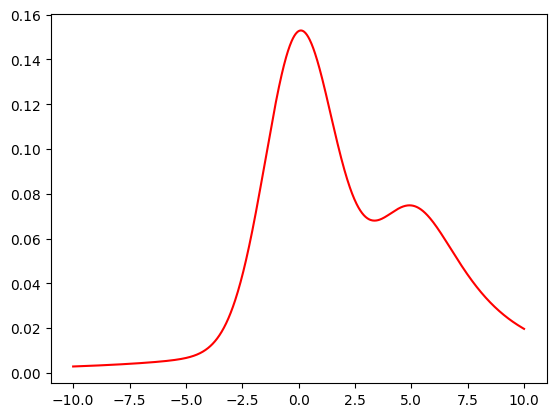

In [30]:
plt.plot(x,y,color='red');

In [31]:
q_N = D.Normal(5,5)
q_U = D.Uniform(-15,15)
q_L = D.Laplace(5,5)


##### Let $M$ be a constant such that $M \geq \frac{p(x)}{q(x)} \forall x$.


In [32]:
M = torch.max(target_pdf(x)/q_N.log_prob(x).exp())
M

tensor(3.2784)

In [33]:
proposed=q_N.log_prob(x).exp()


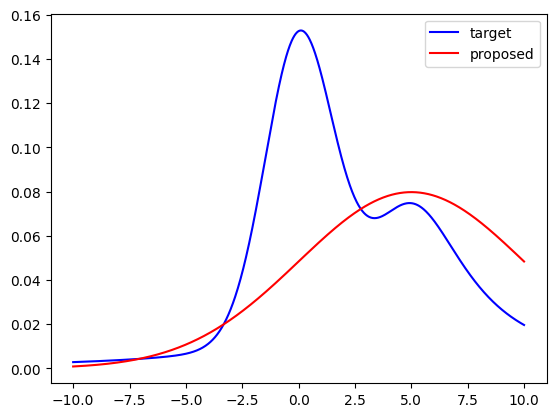

In [34]:
plt.plot(x,y,color='blue',label='target')
plt.plot(x,proposed,color='red',label='proposed')
plt.legend();

In [35]:
u=torch.rand(1)*M
u

tensor([2.3033])

In [36]:
# function for rejection sampling

def rejection_sampling(target,proposal,M,num_samples):
    samples=[]
    accepeted=0
    for _ in range(num_samples):
        x = proposal.sample()
        u = torch.rand(1)
        if u * (M * proposal.log_prob(x).exp()) < target(x):
            samples.append(x)
            accepeted += 1
    return torch.stack(samples),accepeted/num_samples
        


In [37]:
num_samples=1000
sample_normal, acceptance_ratio_normal = rejection_sampling(target_pdf,q_N,M,num_samples)
sample_normal1, acceptance_ratio_Uniform = rejection_sampling(target_pdf,q_U,M,num_samples)
sample_normal2, acceptance_ratio_laplase = rejection_sampling(target_pdf,q_L,M,num_samples)

In [38]:
print('acceptance ratio Normal Proposal:',acceptance_ratio_normal)
print('acceptance ratio Uniform Proposal:',acceptance_ratio_Uniform)
print('acceptance ratio Laplase Proposal:',acceptance_ratio_laplase)

acceptance ratio Normal Proposal: 0.349
acceptance ratio Uniform Proposal: 0.292
acceptance ratio Laplase Proposal: 0.32


In [ ]:
def plot_N_samples(N=100,seed=0;plot_kde=False):
    torch.manual_seed(seed)
    samples_from_q = q_N.sample((N,))

    #evaluate the target distribution at the samples
    